# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 28.5 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "username"
kaggle_key = "userkey"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms


In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 46.5MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv', parse_dates=['datetime'])

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [7]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [8]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates=['datetime'])

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [9]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])

submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  6493 non-null   datetime64[ns]
 1   count     6493 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 101.6 KB


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [10]:
train.drop(['casual', 'registered'], axis=1, inplace=True)

In [11]:
predictor = TabularPredictor(
    label="count", problem_type="regression", eval_metric="root_mean_squared_error"
).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality",
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220728_231750/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220728_231750/"
AutoGluon Version:  0.5.1
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12662.79 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Sta

### Review AutoGluon's training run with ranking of models that did the best.

In [12]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.083668      15.382223  560.203479                0.001336           0.426705            3       True         14
1   RandomForestMSE_BAG_L2  -53.377404      11.321710  416.448236                0.687692          30.612669            2       True         12
2          LightGBM_BAG_L2  -55.148850      10.942257  411.002791                0.308240          25.167223            2       True         11
3          CatBoost_BAG_L2  -55.688382      10.728583  447.828133                0.094565          61.992566            2       True         13
4        LightGBMXT_BAG_L2  -60.366873      14.290389  442.004317                3.656371          56.168750            2       True         10
5    KNeighborsDist_BAG_L1  -84.125061       0.104435    0.042850         

{'leaderboard':                      model   score_val  pred_time_val    fit_time  \
 0      WeightedEnsemble_L3  -53.083668      15.382223  560.203479   
 1   RandomForestMSE_BAG_L2  -53.377404      11.321710  416.448236   
 2          LightGBM_BAG_L2  -55.148850      10.942257  411.002791   
 3          CatBoost_BAG_L2  -55.688382      10.728583  447.828133   
 4        LightGBMXT_BAG_L2  -60.366873      14.290389  442.004317   
 5    KNeighborsDist_BAG_L1  -84.125061       0.104435    0.042850   
 6      WeightedEnsemble_L2  -84.125061       0.105557    0.737257   
 7    KNeighborsUnif_BAG_L1 -101.546199       0.103791    0.036396   
 8   RandomForestMSE_BAG_L1 -116.544294       0.643764   13.249479   
 9     ExtraTreesMSE_BAG_L1 -124.588053       0.654820    5.959696   
 10         CatBoost_BAG_L1 -130.531180       0.153800  193.704611   
 11         LightGBM_BAG_L1 -131.054162       1.291598   29.135788   
 12       LightGBMXT_BAG_L1 -131.460909       7.236413   78.449476   
 13  

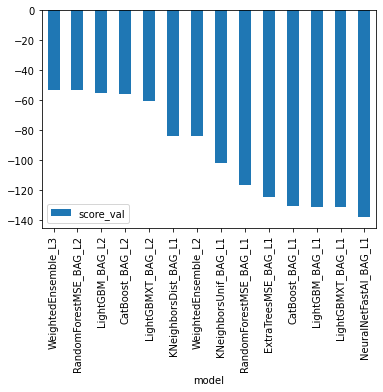

In [13]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

In [14]:
predictions = predictor.predict(test)
predictions.head()

0    23.818266
1    42.192818
2    46.191334
3    49.164108
4    52.113258
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [15]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.838356
std        89.851379
min         3.146469
25%        20.440529
50%        64.875992
75%       167.242493
max       364.330872
Name: count, dtype: float64

In [16]:
# How many negative values do we have?
#there is no negative values appeard in predictions.describe()

In [17]:
# Set them to zero
# no negative values

### Set predictions to submission dataframe, save, and submit

In [18]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [19]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 508kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [20]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2022-07-28 23:28:27  first raw submission               complete  1.79316      1.79316       
submission_new_features.csv  2022-07-28 12:46:39  new features                       complete  0.64566      0.64566       
submission.csv               2022-07-28 12:35:21  first raw submission               complete  1.79432      1.79432       
submission_new_hpo.csv       2022-07-27 22:22:31  new features with hyperparameters  complete  0.64367      0.64367       


#### Initial score of `1.79316 `

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

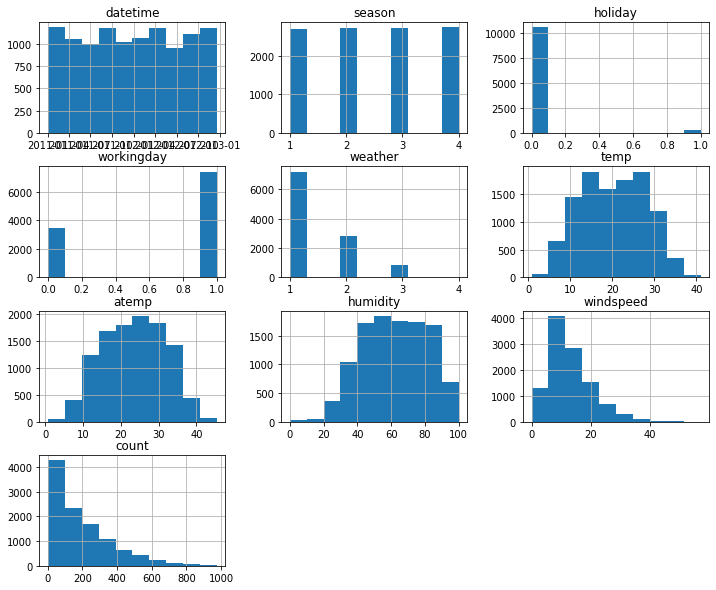

In [21]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist( figsize=(12, 10));

In [22]:
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,16


In [23]:
# create a new feature
train['hour'] = train.datetime.dt.hour
test['hour'] = test.datetime.dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [24]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
train["holiday"] = train["holiday"].astype('category')
train["workingday"] = train["workingday"].astype('category')

test["holiday"] = test["holiday"].astype('category')
test["workingday"] = test["workingday"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [25]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4


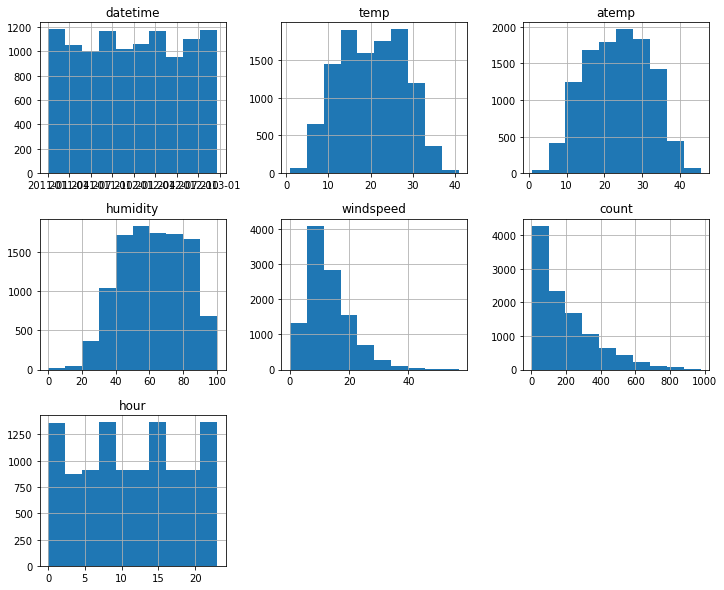

In [26]:
# View histogram of all features again now with the hour feature
train.hist( figsize=(12, 10));

## Step 5: Rerun the model with the same settings as before, just with more features

In [27]:
predictor_new_features = TabularPredictor(
    label="count", problem_type="regression", eval_metric="root_mean_squared_error"
).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality",
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220728_232832/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220728_232832/"
AutoGluon Version:  0.5.1
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 10
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11918.63 MB
	Train Data (Original)  Memory Usage: 0.57 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	St

In [28]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.204980      21.284307  562.909791                0.000955           0.370834            3       True         15
1          CatBoost_BAG_L2  -30.491232      19.000086  473.046640                0.123109          76.210598            2       True         13
2          LightGBM_BAG_L2  -30.604824      19.223349  421.371123                0.346373          24.535080            2       True         11
3        LightGBMXT_BAG_L2  -31.075388      20.113913  428.258869                1.236936          31.422827            2       True         10
4     ExtraTreesMSE_BAG_L2  -31.436749      19.586849  407.018801                0.709872          10.182758            2       True         14
5   RandomForestMSE_BAG_L2  -31.599319      19.576934  430.370452         

{'leaderboard':                      model   score_val  pred_time_val    fit_time  \
 0      WeightedEnsemble_L3  -30.204980      21.284307  562.909791   
 1          CatBoost_BAG_L2  -30.491232      19.000086  473.046640   
 2          LightGBM_BAG_L2  -30.604824      19.223349  421.371123   
 3        LightGBMXT_BAG_L2  -31.075388      20.113913  428.258869   
 4     ExtraTreesMSE_BAG_L2  -31.436749      19.586849  407.018801   
 5   RandomForestMSE_BAG_L2  -31.599319      19.576934  430.370452   
 6      WeightedEnsemble_L2  -32.179730      17.207126  351.028732   
 7          LightGBM_BAG_L1  -33.919639       3.186809   39.568938   
 8          CatBoost_BAG_L1  -34.069944       0.217105  206.587269   
 9        LightGBMXT_BAG_L1  -34.457274      13.077046   90.373610   
 10    ExtraTreesMSE_BAG_L1  -38.323016       1.084539    7.454404   
 11  RandomForestMSE_BAG_L1  -38.445932       0.620057   13.935830   
 12   KNeighborsDist_BAG_L1  -84.125061       0.105250    0.043741   
 13  

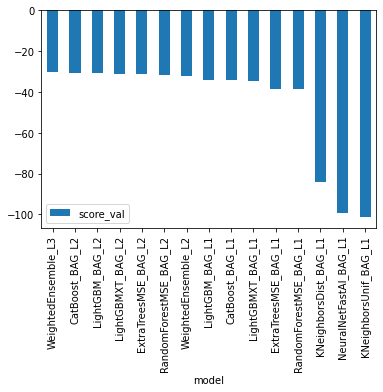

In [29]:
predictor_new_features.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [30]:
predictions = predictor_new_features.predict(test)
predictions.head()

0    16.662224
1    10.725938
2    10.321331
3     8.665792
4     7.531897
Name: count, dtype: float32

In [31]:
predictions.describe()

count    6493.000000
mean      151.830704
std       130.431885
min         1.551490
25%        52.883125
50%       117.832321
75%       216.728973
max       809.586121
Name: count, dtype: float64

In [32]:
# Remember to set all negative values to zero
# no negative values..

In [33]:
# Same submitting predictions
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])

submission_new_features["count"] = predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [34]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 505kB/s]
Successfully submitted to Bike Sharing Demand

In [35]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6 

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2022-07-28 23:39:26  new features                       complete  0.67588      0.67588       
submission.csv               2022-07-28 23:28:27  first raw submission               complete  1.79316      1.79316       
submission_new_features.csv  2022-07-28 12:46:39  new features                       complete  0.64566      0.64566       
submission.csv               2022-07-28 12:35:21  first raw submission               complete  1.79432      1.79432       


#### New Score of `0.67588`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [38]:
predictor_new_hpo = TabularPredictor(
    label="count", problem_type="regression", eval_metric="root_mean_squared_error"
).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality",
    num_bag_folds=10,
    num_bag_sets=1,
    num_stack_levels=1

)

No path specified. Models will be saved in: "AutogluonModels/ag-20220728_234027/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=10, num_bag_sets=1
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220728_234027/"
AutoGluon Version:  0.5.1
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 10
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11689.26 MB
	Train Data (Original)  Memory Usage: 0.57 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	St

In [39]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.068429      19.251250  537.421759                0.000851           0.308708            3       True         14
1          LightGBM_BAG_L2  -30.292245      17.937015  432.073390                0.456359          32.312972            2       True         11
2          CatBoost_BAG_L2  -30.612715      17.650901  465.766295                0.170245          66.005877            2       True         13
3        LightGBMXT_BAG_L2  -31.046981      18.623795  438.794202                1.143139          39.033784            2       True         10
4   RandomForestMSE_BAG_L2  -31.685662      18.186144  433.578034                0.705488          33.817616            2       True         12
5      WeightedEnsemble_L2  -32.012853      16.238964  362.054535         

{'leaderboard':                      model   score_val  pred_time_val    fit_time  \
 0      WeightedEnsemble_L3  -30.068429      19.251250  537.421759   
 1          LightGBM_BAG_L2  -30.292245      17.937015  432.073390   
 2          CatBoost_BAG_L2  -30.612715      17.650901  465.766295   
 3        LightGBMXT_BAG_L2  -31.046981      18.623795  438.794202   
 4   RandomForestMSE_BAG_L2  -31.685662      18.186144  433.578034   
 5      WeightedEnsemble_L2  -32.012853      16.238964  362.054535   
 6          LightGBM_BAG_L1  -33.473999       4.013668   56.767647   
 7        LightGBMXT_BAG_L1  -34.167031      11.333021  118.542074   
 8          CatBoost_BAG_L1  -34.544325       0.159398  172.334013   
 9     ExtraTreesMSE_BAG_L1  -38.323016       0.627523    6.548234   
 10  RandomForestMSE_BAG_L1  -38.445932       0.621434   13.764036   
 11   KNeighborsDist_BAG_L1  -84.125061       0.110133    0.049762   
 12   KNeighborsUnif_BAG_L1 -101.546199       0.104434    0.126704   
 13  

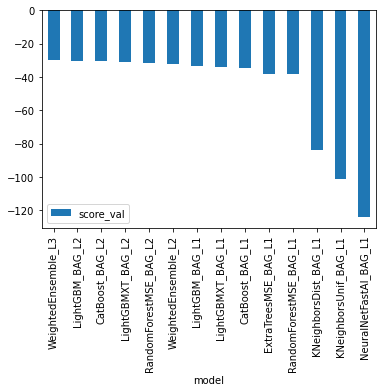

In [40]:
predictor_new_hpo.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [41]:
predictions = predictor_new_hpo.predict(test)
predictions.head()

0    15.714318
1    11.140336
2    10.666472
3     9.685389
4     8.403942
Name: count, dtype: float32

In [42]:
predictions.describe()

count    6493.000000
mean      159.858887
std       136.948853
min         1.764388
25%        53.424366
50%       124.066559
75%       229.809692
max       789.087585
Name: count, dtype: float64

In [43]:
# Remember to set all negative values to zero
# no negative values.

In [44]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('sampleSubmission.csv')
submission_new_hpo['datetime'] = pd.to_datetime(submission_new_hpo['datetime'])

submission_new_hpo["count"] = predictions
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [45]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 490kB/s]
Successfully submitted to Bike Sharing Demand

In [46]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-07-28 23:51:34  new features with hyperparameters  complete  0.65606      0.65606       
submission_new_features.csv  2022-07-28 23:39:26  new features                       complete  0.67588      0.67588       
submission.csv               2022-07-28 23:28:27  first raw submission               complete  1.79316      1.79316       
submission_new_features.csv  2022-07-28 12:46:39  new features                       complete  0.64566      0.64566       


#### New Score of `0.65606`

> Indented block



## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

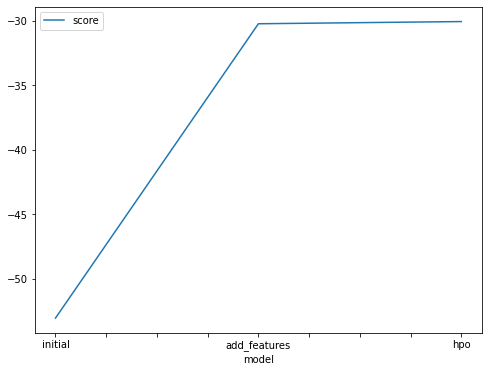

In [50]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-53.070380, -30.216353,  -30.045376]
    } 
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

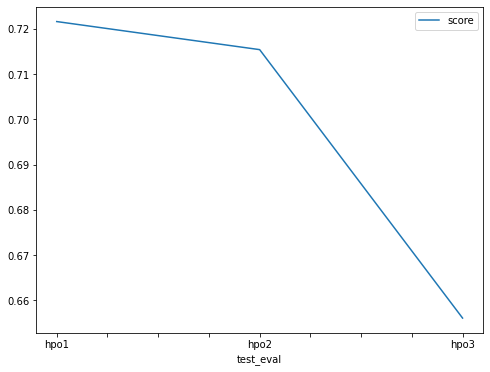

In [51]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["hpo1", "hpo2", "hpo3"],
        "score": [0.72165, 0.71544, 0.65606]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [49]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model"           : ["initial", "add_features", "hpo"],
    "num_bag_folds"   : [   0,           0,           10  ],
    "num_stack_levels": [   0,           0,           1 ],
    "num_bag_sets"    : [   0,           0,           1  ],
    "score"           : [1.79316,     0.67588,    0.65606]
})

#hpo1:     num_stack_levels=2,
#          num_bag_folds=5,
#          num_bag_sets=1

#hpo2:     num_stack_levels=1,
#          num_bag_folds=5,
#          num_bag_sets=1

#hpo3:     num_stack_levels=1,
#          num_bag_folds=10,
#          num_bag_sets=1

,model,num_bag_folds,num_stack_levels,num_bag_sets,score
0,initial,0,0,0,1.78936
1,add_features,0,0,0,0.65724
2,hpo,10,1,1,0.64367
